# Aprendizaje Supervisado

## Introducción

La base de datos utilizada contiene información de diferentes indicadores, así como un total de 3,862 registros en un periodo de 01/07/2008 - 31/10/2023:

    1. Precio USD/MXN
    2. Producto Interno Bruto (PIB)
    3. Índice de desempleo
    4. Índice Nacional de Precios al Consumidor (INPC)
    5. Indicador Global de la Actividad Económica
    6. Indicador de Pedidos Manufactureros
    
Donde la variable Precio USD/MXN es nuestra variable dependiente y las demás variables son nuestras variables independientes, las seis variables presentadas son continuas.
    
Como algunos indicadores se presentan de manera mensual o trimestral se realizó una interpolación para que todos estuvieran en un mismo periodo diario, así como se presenta el precio del USD/MXN.

### Regresión de Bosques Aleatorios (Random Forest Regression)

El Random Forest Regression es un algoritmo de aprendizaje automático que pertenece a la categoría de métodos de ensamble. Un ensamble es un modelo que combina múltiples modelos individuales para obtener un rendimiento general mejor que el de cada uno de los modelos componentes. En el caso de los Bosques Aleatorios, estos están compuestos por múltiples árboles de decisión.

Esta es una descripción general de cómo funciona la Regresión de Bosques Aleatorios:

- Un Bosque Aleatorio consta de un conjunto de árboles de decisión. Cada árbol se entrena de forma independiente en una porción aleatoria de los datos.
   
- En cada nodo del árbol, en lugar de considerar todas las variables predictoras disponibles, se selecciona un subconjunto aleatorio de características. Este proceso se conoce como "muestreo aleatorio de características" y ayuda a decorrelacionar los árboles, evitando que todos se centren en las mismas variables.
    
- Cada árbol se construye de manera recursiva dividiendo los datos en función de las características seleccionadas. El proceso de división se repite hasta alcanzar un criterio de parada, como la profundidad máxima del árbol o un número mínimo de observaciones en una hoja.
    
- La predicción de un Bosque Aleatorio para un nuevo conjunto de datos se obtiene promediando las predicciones de todos los árboles individuales. En el caso de la regresión, esta operación sería un promedio ponderado de las salidas de los árboles.

- El ensamble de árboles y el muestreo aleatorio de características hacen que los Bosques Aleatorios sean robustos y menos propensos al sobreajuste en comparación con un solo árbol de decisión.

Los Bosques Aleatorios son versátiles y pueden aplicarse tanto a problemas de clasificación como de regresión. Son conocidos por su capacidad para manejar grandes conjuntos de datos con muchas características, así como por su buen rendimiento sin requerir ajustes finos complejos.

<img src="EjemploArbol.jpg" alt="Regresión de Bosques Aleatorios (Random Forest Regression)" width="50%"/>

## Aplicación del Modelo Supervisado

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
#Importar datos
df = pd.read_excel(r'C:\Users\tmoli\OneDrive\Documentos\Angel\Maestria\Materias\3. Aprendizaje Automatico\BD\df_USDMXN.xlsx')

df = df[['TipoCambio', 'PIB', 'INPC', 'IndiceDesempleo','Indice_Pedidos_Manufactureros', 'IGAE']]

Error Cuadrático Medio: 0.017251472545279384
Importancia de las Características:
PIB: 0.3578452920193104
INPC: 0.15438808827723544
IndiceDesempleo: 0.018862268775020685
Indice_Pedidos_Manufactureros: 0.12250522752673121
IGAE: 0.3463991234017023


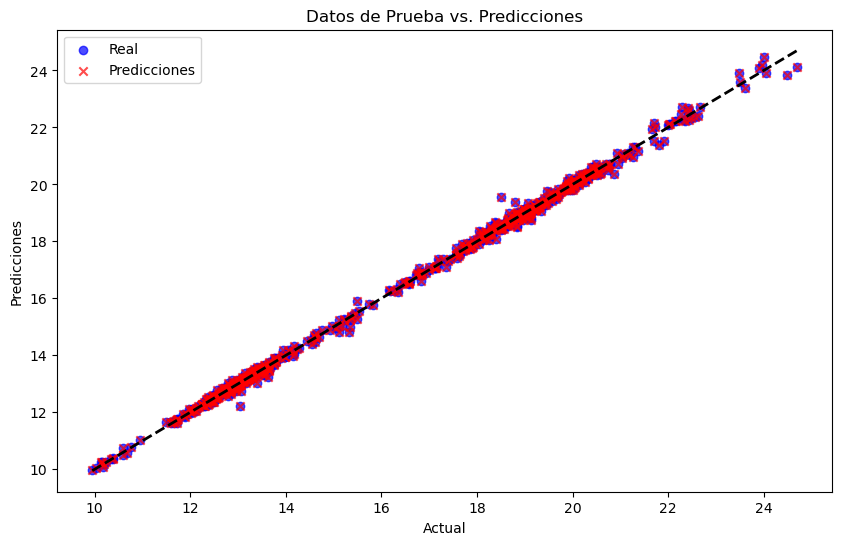

In [6]:
# Seleccionar las características (X) y la variable objetivo (y)
X = df.drop("TipoCambio", axis=1)
y = df["TipoCambio"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión de Bosques Aleatorios
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = rf_model.predict(X_test)

# También puedes examinar la importancia de las características
feature_importances = rf_model.feature_importances_
print("Importancia de las Características:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Crear un DataFrame con los resultados reales y predicciones
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Graficar los resultados con colores diferentes
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], c='blue', label='Real', alpha=0.7)
plt.scatter(results_df['Actual'], results_df['Predicted'], c='red', label='Predicciones', alpha=0.7, marker='x')  # Puntos predichos en rojo
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Datos de Prueba vs. Predicciones')
plt.xlabel('Actual')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Error Cuadrático Medio (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, predictions)

# Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

#Error Absoluto Medio (MAE - Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)

#Porcentaje Absoluto Medio de Error (MAPE - Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

#Coeficiente de Determinación (R²)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Porcentaje Absoluto Medio de Error (MAPE): {mape}%")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.017251472545279384
Raíz del Error Cuadrático Medio (RMSE): 0.13134486113007765
Error Absoluto Medio (MAE): 0.08803317076325996
Porcentaje Absoluto Medio de Error (MAPE): 0.5339152744717226%
Coeficiente de Determinación (R²): 0.998495991155189


Los resultados de las métricas indican un rendimiento bastante bueno del modelo de Regresión de Bosques Aleatorios:

1. Error Cuadrático Medio (MSE):
    - Un MSE de 0.0172 es relativamente bajo, lo que sugiere que las predicciones están bastante cerca de los valores reales.


2. Raíz del Error Cuadrático Medio (RMSE):
    - Un RMSE de 0.1313 indica que, en promedio, las predicciones están desviadas por aproximadamente 0.13 unidades de la variable objetivo.


3. Error Absoluto Medio (MAE):
    - Un MAE de 0.0880 sugiere que, en promedio, las predicciones tienen un error absoluto de aproximadamente 0.088 unidades.


4. Porcentaje Absoluto Medio de Error (MAPE):
    - Un MAPE del 0.534% indica que, en promedio, las predicciones tienen un error absoluto del 0.534% en comparación con los valores reales.


5. Coeficiente de Determinación (R²):
    - Un R² de 0.9985 es muy alto y sugiere que el modelo explica el 99.85% de la variabilidad en la variable objetivo. En términos simples, el modelo se ajusta muy bien a los datos.

## Conclusión

Tras analizar las métricas de rendimiento aplicadas al modelo, concluimos que la elección óptima para la predicción del precio del USD/MXN puede ser el modelo supervisado de Regresión de Bosques Aleatorios (Random Forest Regression). Sin embargo, es crucial realizar investigaciones adicionales para determinar si este modelo debe cumplir con ciertos supuestos antes de ser considerado como la solución final y funcional. Este paso adicional garantizará la robustez y la confiabilidad del modelo en entornos diversos y situaciones específicas.

## Bibliografía

1. Ligdi Gonzalez, "Bosque Aleatorios Regresión – Teoría", 2023, (https://aprendeia.com/bosques-aleatorios-regresion-teoria-machine-learning/)
2. Ligdi Gonzalez, "BOSQUES ALEATORIOS REGRESIÓN - PRÁCTICA | #30 Curso Machine Learning con Python", 2019, (https://www.youtube.com/watch?v=E2u-VxSXPXc)